# Deep Learning Project - Traffic Signs Image Classification

In [ ]:
import os, shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [ ]:
def save_hist_to_excel(filename):
    df = pd.DataFrame(history.history)
    df.to_excel(filename + '.xlsx')

## Overview of the training data

In [ ]:
#setting the training directory (the training images can be found there, already sorted by class into folders)
base_training_dir = "/Users/franz/Desktop/DL Project/Train/Final_Training/Images"
#base_training_dir = "/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/"

#setting the directory where the selected training and validation images will be stored in
created_dir = "/Users/franz/Desktop/DL Project/Selected"
#created_dir = "/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Selected"

#storing all the folder names that belong to the respective classes
all_classes = sorted(i for i in os.listdir(base_training_dir) if i.startswith("0"))

print("There are", len(all_classes), "different classes within the training data!")

In [ ]:
#getting the number of images within each class of the training data
amount_per_class = {}

for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory) if i.startswith("0")))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

#remove the "#" of the following line to display the number of images within each class
#amount_per_class_df

In [ ]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(amount_per_class_df.index, amount_per_class_df.amount)
plt.title("Number of images per class", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(amount_per_class_df.index)
plt.grid(axis="y")
plt.show()

As it can be seen in the bar chart, the dataset is highly unbalanced. Some classes have over 2000 instances, while others only have 210.

In [ ]:
#displaying the 20 classes with the fewest images
amount_per_class_df.sort_values("amount").head(20).T

Within each class, there are several groups of images, that belong together (these are basically all images of the very same traffic sign, that just differ in that they were made as a series while approaching the actual sign). These series of images shouldn't be splitted later when the data is split into training and validation sets, so some precautions might be useful:

In [ ]:
#checking the size(=amount of images) of these series and whether they are all having the same size

#running a for loop over all classes
for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    
    #get the names of all images within a class
    list_of_images = sorted(i for i in os.listdir(directory) if i.startswith("0"))

    image_series = []
    
    #store all the prefixes of the images (which correspond to the series they belong to)
    for element in list_of_images:
        image_series.append(element.split("_")[0])
    
    #count the frequency of each prefix, which equals the size of each respective series
    image_counts = pd.Series(image_series).value_counts().sort_index()

    for element in image_counts.values.tolist():
        if element != image_counts.values.tolist()[0]:
            #this line will show if there is a series that contains not the same number of images than the others
            print("There is a series whose number doesn't match the others in class", all_classes[i], ", with the prefix", image_counts.sort_values().index[0], "!\nIt only contains", element, "images.")
            

#apart from only one series, all others consist of exactly 30 images
print("All the other series of images contain exactly", image_counts.values.tolist()[0], "images!")

## Split into training and validation datasets

In [ ]:
new_train_dir = "/Users/franz/Desktop/DL Project/Selected/train_all"
#new_train_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Selected/train_all'
new_val_dir = "/Users/franz/Desktop/DL Project/Selected/val_all"
#new_val_dir = '/Users/philippmetzger/Documents/GitHub/Deep_Learning_Project_Group_10/Data/Selected/val_all'

In [ ]:
for i in range(len(all_classes)):
    os.mkdir(new_train_dir + "/" + all_classes[i])
    os.mkdir(new_val_dir + "/" + all_classes[i])

In [ ]:
import random

for i in range(len(all_classes)):
    
    list_ = os.listdir(base_training_dir + "/" + all_classes[i])
    random.shuffle(list_)
    new_list = []
    for element in list_:
        if element.startswith("000"):
            new_list.append(element)
    
    new_list = sorted(new_list)
    for image in range(len(new_list)):
        
        
        #setting the cut off according to the next closest number in steps of 30 according to a 70:30 ratio
        if len(new_list) == 210 or len(new_list) == 240:
            cut = 60
        elif len(new_list) == 270 or len(new_list) == 300 or len(new_list) == 330:
            cut = 90
        elif len(new_list) == 360 or len(new_list) == 390 or len(new_list) == 420:
            cut = 120
        elif len(new_list) == 450 or len(new_list) == 510 or len(new_list) == 540:
            cut = 150
        elif len(new_list) == 600 or len(new_list) == 630:
            cut = 180
        elif len(new_list) == 689:
            cut = 210 - 1
        elif len(new_list) == 780:
            cut = 240
        elif len(new_list) == 1110:
            cut = 330
        elif len(new_list) == 1200:
            cut = 360
        elif len(new_list) == 1320:
            cut = 390
        elif len(new_list) == 1410 or len(new_list) == 1440:
            cut = 420
        elif len(new_list) == 1470 or len(new_list) == 1500:
            cut = 450
        elif len(new_list) == 1860:
            cut = 570
        elif len(new_list) == 1980 or len(new_list) == 2010:
            cut = 600
        elif len(new_list) == 2070 or len(new_list) == 2100:
            cut = 630
        elif len(new_list) == 2160 or len(new_list) == 2220:
            cut = 660
        elif len(new_list) == 2250:
            cut = 690
         
        
        if image < len(new_list) - cut:
            
            src = base_training_dir + "/" + all_classes[i] + "/" + new_list[image]
            dst = new_train_dir + "/" + all_classes[i] + "/"  + new_list[image]
            shutil.copyfile(src, dst)
            
        else:
            src = base_training_dir + "/" + all_classes[i] + "/" + new_list[image]
            dst = new_val_dir + "/" + all_classes[i] + "/"  + new_list[image]
            shutil.copyfile(src, dst)

In [ ]:
size_per_class_list = []

for i in range(len(all_classes)):
    size_per_class_list.append([len(os.listdir(new_train_dir + "/" + all_classes[i])), len(os.listdir(new_val_dir + "/" + all_classes[i]))])
    print("Class", i, ": training set size =", len(os.listdir(new_train_dir + "/" + all_classes[i])), "; validation set size:", len(os.listdir(new_val_dir + "/" + all_classes[i])))

## Data augmentation for balancing the data set

In [ ]:
augdir_train = "/Users/franz/Desktop/DL Project/Selected/augmented_train"
augdir_val = "/Users/franz/Desktop/DL Project/Selected/augmented_val"

In [ ]:
size_per_class_df = pd.DataFrame(size_per_class_list).rename(columns={0:"train_size", 1:"validation_size"})
size_per_class_df.sort_values("train_size", ascending=False).head(1)

The biggest class is class 2, with a train_size of 1560 images and a validation_size of 690 images. The following approach will upsample all the classes accordingly, so that the are all of this size:

In [ ]:
needed_images = size_per_class_df.copy()
needed_images["train_size"] =  int(size_per_class_df.sort_values("train_size", ascending=False).head(1)["train_size"]) - needed_images["train_size"]
needed_images["validation_size"] = int(size_per_class_df.sort_values("validation_size", ascending=False).head(1)["validation_size"]) - needed_images["validation_size"]
needed_images.head()

In [ ]:
for element in os.listdir(new_train_dir):
    if element != ".DS_Store":
        os.mkdir(augdir_train + "/" + element)
        os.mkdir(augdir_val + "/" + element)

In [ ]:
train_dir = new_train_dir
validation_dir = new_val_dir

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#defining the parameters how the images will be adjusted
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode="nearest")

In [ ]:
#upsampling the training images for each class until they have the same size as the biggest one

from keras.preprocessing import image
import matplotlib.pyplot as plt
import random

classes = os.listdir(train_dir)
classes.remove(".DS_Store")
classes = sorted(classes)

completed = 1

for number in range(len(classes)):
    names = os.listdir(os.path.join(train_dir, classes[number]))
    
    limit = 0
    
    i = 0
    
    while limit < needed_images.iloc[number]["train_size"]:
        random_number = random.randint(0, size_per_class_df.iloc[number]["train_size"]-1)
        img_path = os.path.join(train_dir, classes[number], names[random_number])

        img = image.load_img(img_path, target_size=(150, 150))

        x = image.img_to_array(img)

        x = x.reshape((1,) + x.shape)

        
        batch = datagen.flow(x, batch_size=1)
        fig = plt.figure(0,frameon=False,figsize=(6,6))
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        imgplot = ax.imshow(image.array_to_img(batch[0][0]))
        plt.savefig(augdir_train + "/" + classes[number] + "/augmented_" + str(i) + ".jpg")
        i += 1
        plt.close()
            
    
        limit += 1
    
    if completed < 43:
        print(str(completed) + "/43 completed...")
    else:
        print(str(completed) + "/43 completed!")
    completed += 1
    


In [ ]:
#upsampling the training images for each class until they have the same size as the biggest one

classes = os.listdir(validation_dir)
classes.remove(".DS_Store")
classes = sorted(classes)

completed = 1

for number in range(len(classes)):
    names = os.listdir(os.path.join(validation_dir, classes[number]))
    
    limit = 0
    
    i = 0
    
    while limit < needed_images.iloc[number]["val_size"]:
        random_number = random.randint(0, size_per_class_df.iloc[number]["val_size"]-1)
        img_path = os.path.join(validation_dir, classes[number], names[random_number])

        img = image.load_img(img_path, target_size=(150, 150))

        x = image.img_to_array(img)

        x = x.reshape((1,) + x.shape)

        
        batch = datagen.flow(x, batch_size=1)
        fig = plt.figure(0,frameon=False,figsize=(6,6))
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        imgplot = ax.imshow(image.array_to_img(batch[0][0]))
        plt.savefig(augdir_val + "/" + classes[number] + "/augmented_" + str(i) + ".jpg")
        i += 1
        plt.close()
            
    
        limit += 1
    
    if completed < 43:
        print(str(completed) + "/43 completed...")
    else:
        print(str(completed) + "/43 completed!")
    completed += 1
    


In [24]:
#copying the augmented images into the folder with the actual ones

for i in range(len(all_classes)):
    
    image_list = os.listdir(augdir_train + "/" + all_classes[i])
    
    for image in image_list:
    
        src = augdir_train + "/" + all_classes[i] + "/" + image
        dst = train_dir + "/" + all_classes[i] + "/"  + image
        shutil.copyfile(src, dst)
    
    
for i in range(len(all_classes)):
    
    image_list = os.listdir(augdir_val + "/" + all_classes[i])
    
    for image in image_list:
    
        src = augdir_val + "/" + all_classes[i] + "/" + image
        dst = validation_dir + "/" + all_classes[i] + "/"  + image
        shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/franz/Desktop/DL Project/Selected/augmented_val/00000/augmented_400.jpg'

In [29]:
#checking the number of images within each class (should now be all the same size)
amount_per_class = {}

for i in range(len(all_classes)):
    directory = train_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory)))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

#remove the "#" of the following line to display the number of images within each class
#amount_per_class_df

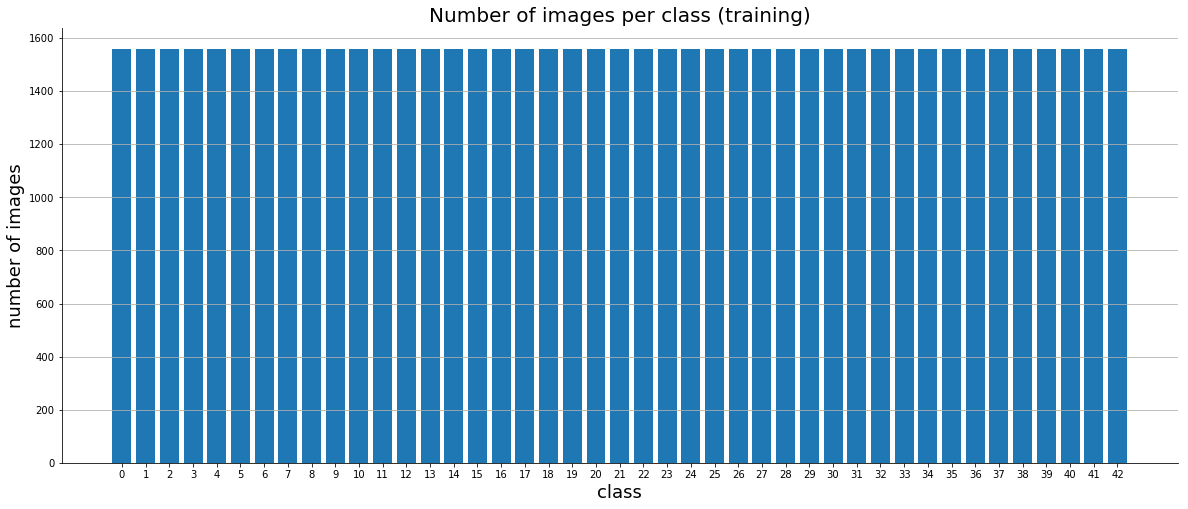

In [31]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(amount_per_class_df.index, amount_per_class_df.amount)
plt.title("Number of images per class (training)", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(amount_per_class_df.index)
plt.grid(axis="y")
plt.show()

In [34]:
#checking the number of images within each class (should now be all the same size)
amount_per_class = {}

for i in range(len(all_classes)):
    directory = validation_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory)))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

#remove the "#" of the following line to display the number of images within each class
#amount_per_class_df

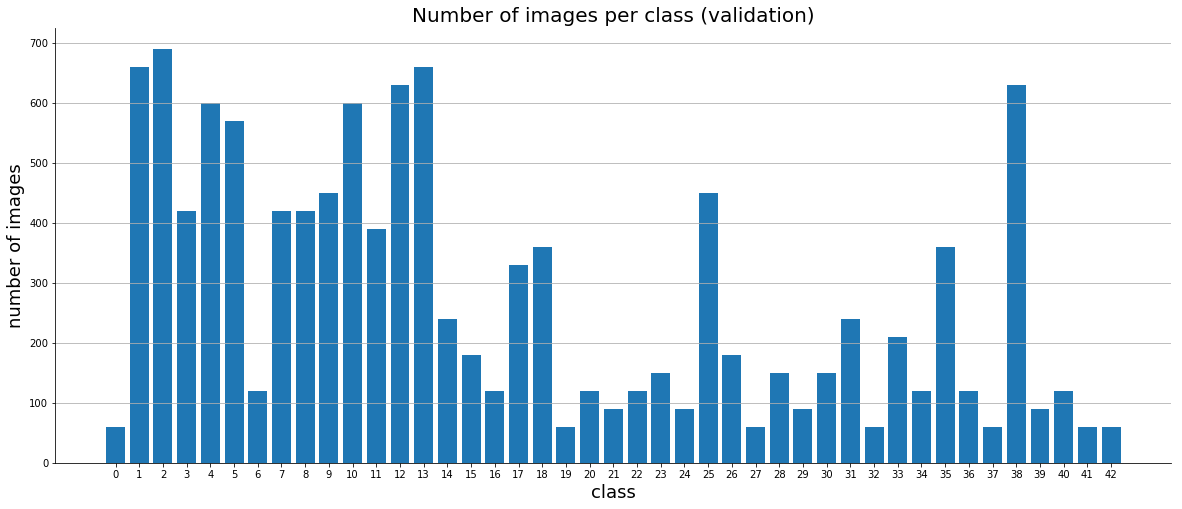

In [36]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(amount_per_class_df.index, amount_per_class_df.amount)
plt.title("Number of images per class (validation)", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(amount_per_class_df.index)
plt.grid(axis="y")
plt.show()

## Data Preprocessing

In [ ]:
import os, shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

## Draft of the model

#### Building the model

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2) ))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense (43, activation='softmax'))

In [ ]:
model.summary()

#### Training the model

In [ ]:
from keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

In [ ]:
#Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

As it can be seen, the major problem so far is overfitting!

## Overfitting reduce technique 1: Rebuidling the model with dropout

Overview of some techniques: https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d

In [ ]:
train_dir = os.path.join(created_dir, "training")
# os.mkdir(train_dir)
validation_dir = os.path.join(created_dir, "validation")
# os.mkdir(validation_dir)

In [ ]:
from keras import layers
from keras import models

dropout_prob = 0.9

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2) ))
model.add(layers.Flatten())
model.add(layers.Dropout(dropout_prob))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense (43, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
from keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [ ]:
# Load a saved model

import keras

# model = keras.models.load_model('all_data_1_epoch')

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
    )

In [ ]:
# Epochs 6 - 10: Another 5 epochs with dropout(0.9)

history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
    )

In [ ]:
# Epochs 11 - 15: Another 5 epochs with dropout(0.9)

history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
    )

In [ ]:
# Epochs 16 - 20: Another 5 epochs with dropout(0.9)

history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
    )

In [ ]:
# This was with dropout(0.3):

history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
    )

In [ ]:
model.save('model_all_data_20_epochs_dropout_0_9')

In [ ]:
save_hist_to_excel('history_all_data_20_epochs_dropout_0_9')

In [ ]:
#Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

## Overfitting reduce technique 2: Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#defining the parameters how the images will be adjusted
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

##### Creating augmented images

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import random

completed = 1
#getting one image from each series of pictures and create 30 new augmented ones and save them
for element in range(len(os.listdir(train_dir))):
    if ".DS_Store" not in os.listdir(train_dir)[element]:
        series = []

        while len(series) < 5:

            names = [os.path.join(train_dir + "/" + os.listdir(train_dir)[element], name) for name in os.listdir(train_dir + "/" + os.listdir(train_dir)[element])]
            for element_name in names:
                if ".DS_Store" in element_name:
                    names.remove(element_name)
                
            #choosing a random image
            number = random.randint(0, 149)
        
        
            img_path = names[number]
    
            if img_path.split("/")[-1].split("_")[0] not in series:
                #make sure that each series will be dealt with
                series.append(img_path.split("/")[-1].split("_")[0])

                img = image.load_img(img_path, target_size=(150, 150))

                x = image.img_to_array(img)

                x = x.reshape((1,) + x.shape)

                i = 0
                #create the images and save them
                for batch in datagen.flow(x, batch_size=1):
                    fig = plt.figure(i,frameon=False,figsize=(6,6))
                    ax = plt.Axes(fig, [0., 0., 1., 1.])
                    ax.set_axis_off()
                    fig.add_axes(ax)
                    imgplot = ax.imshow(image.array_to_img(batch[0]))
                    image_name = str(i)
                    plt.savefig(train_dir + "/" + os.listdir(train_dir)[element] + "/" + img_path.split("/")[-1].split("_")[0] +"_augmented"+str(i)+".jpg")
                    plt.close()
                    i += 1
                    if i == 30:
                        break
                    
    print(str(completed)+"/43 completed...")
    completed += 1

##### Redefining the generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

##### Rebuilding the model

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2) ))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense (43, activation='softmax'))

In [ ]:
model.summary()

##### Training the model

In [ ]:
from keras import optimizers

#compilation
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=validation_generator
    )

In [ ]:
#Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()